In [ ]:
! pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!mkdir ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
! kaggle datasets download crowww/a-large-scale-fish-dataset

 99% 3.22G/3.24G [00:26<00:00, 129MB/s]
100% 3.24G/3.24G [00:26<00:00, 130MB/s]


In [ ]:
! unzip a-large-scale-fish-dataset

Streaming output truncated to the last 5000 lines.
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00435.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00436.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00437.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00438.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00439.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00440.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00441.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00442.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00443.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00444.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00445.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00446.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00447.png  
  inflating: Fish_Dataset/Fish_Dataset/Shrimp/Shrimp/00448.png  
  inflating: Fish_Dataset/Fish_Dataset/


Importing Libraries

In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os

Data Loading

In [ ]:
dir = '/content/Fish_Dataset'
label = []
path = []
for dirname, _,filenames in os.walk(dir):
    for filename in filenames:
        if os.path.splitext(filename)[1]=='.png':
            if dirname.split()[-1]!='GT':          
                label.append(os.path.split(dirname)[1])
                path.append(os.path.join(dirname,filename))

df = pd.DataFrame(columns=['path','label'])
df['path']=path
df['label']=label

Data Analysis

In [ ]:
df.head()

,path,label
0,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
1,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
2,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
3,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet
4,/content/Fish_Dataset/Fish_Dataset/Striped Red...,Striped Red Mullet


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9000 entries, 0 to 8999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   path    9000 non-null   object
 1   label   9000 non-null   object
dtypes: object(2)
memory usage: 140.8+ KB


In [ ]:
df['label']=df['label'].astype('category')

In [ ]:
df['label'].value_counts()

Black Sea Sprat       1000
Gilt-Head Bream       1000
Hourse Mackerel       1000
Red Mullet            1000
Red Sea Bream         1000
Sea Bass              1000
Shrimp                1000
Striped Red Mullet    1000
Trout                 1000
Name: label, dtype: int64

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df['label'].unique()

['Striped Red Mullet', 'Hourse Mackerel', 'Red Mullet', 'Black Sea Sprat', 'Sea Bass', 'Gilt-Head Bream', 'Shrimp', 'Trout', 'Red Sea Bream']
Categories (9, object): ['Black Sea Sprat', 'Gilt-Head Bream', 'Hourse Mackerel', 'Red Mullet', ...,
                         'Sea Bass', 'Shrimp', 'Striped Red Mullet', 'Trout']

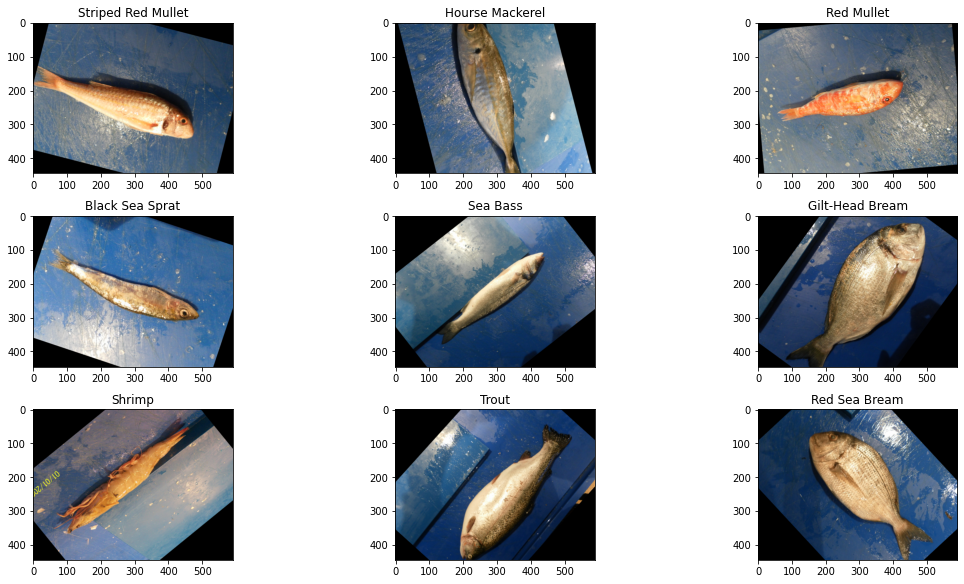

In [ ]:
fig, ax = plt.subplots(nrows=3, ncols=3, figsize=(15,8), constrained_layout=True)
ax=ax.flatten()
j=0
for i in df['label'].unique():
    
    ax[j].imshow(plt.imread(df[df['label']==i].iloc[0,0]))
    ax[j].set_title(i)
    j=j+1

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


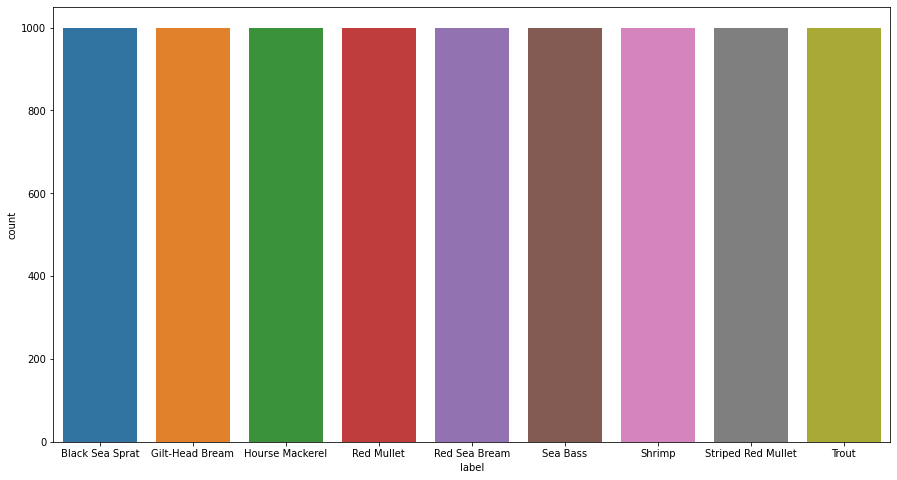

In [ ]:
fig=plt.figure(figsize=(15,8))
sns.countplot(df['label'])

In [ ]:
plt.imread(df['path'][1]).shape

(445, 590, 3)

In [ ]:

from sklearn.model_selection import train_test_split
X_train, X_test=train_test_split(df, test_size=0.2, random_state=42)

In [ ]:
print(X_train.shape)
print(X_test.shape)

(7200, 2)
(1800, 2)


In [ ]:
from tensorflow.keras.applications import ResNet50V2, MobileNetV2
from tensorflow.keras.applications.resnet import preprocess_input
from tensorflow.keras.preprocessing.image import ImageDataGenerator

trainGen = ImageDataGenerator(preprocessing_function=preprocess_input, validation_split=0.3)
testGen =ImageDataGenerator(preprocessing_function= preprocess_input)
X_train_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='training', color_mode='rgb', batch_size=32)
X_val_img = trainGen.flow_from_dataframe(dataframe=X_train, x_col='path', y_col='label',class_mode='categorical', subset='validation', color_mode='rgb', batch_size=32)
X_test_img =testGen.flow_from_dataframe(dataframe=X_test, x_col='path', y_col='label',class_mode='categorical', color_mode='rgb', batch_size=32, shuffle=False)

Found 5040 validated image filenames belonging to 9 classes.
Found 2160 validated image filenames belonging to 9 classes.
Found 1800 validated image filenames belonging to 9 classes.


/usr/local/lib/python3.7/dist-packages/matplotlib/text.py:1165: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if s != self._text:


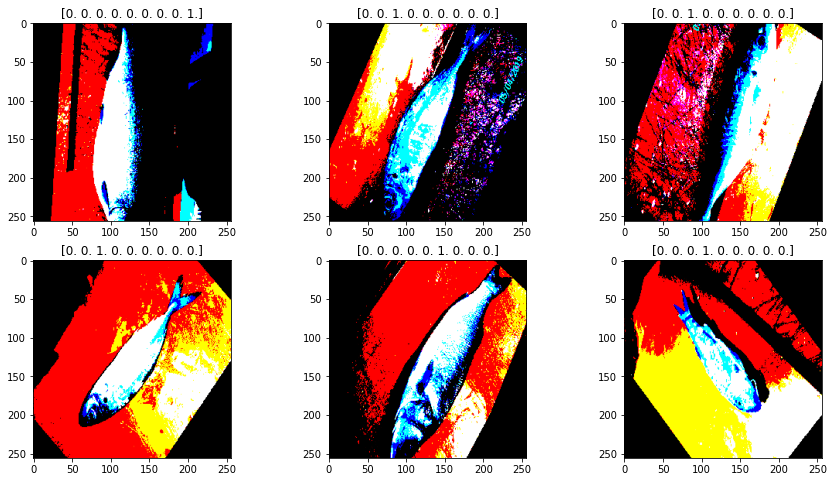

In [ ]:
fit, ax= plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
j=0
for _ in range(6):
    img, label = X_test_img.next()
    #print(img.shape)   #  (1,256,256,3)
    ax[j].imshow(img[0],)
    ax[j].set_title(label[0])
    #plt.show()
    j=j+1

In [ ]:
X_test_img[0][0].shape

(32, 256, 256, 3)

In [ ]:
image_shape=(256,256,3)

In [ ]:
X_train_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_val_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
X_test_img.class_indices

{'Black Sea Sprat': 0,
 'Gilt-Head Bream': 1,
 'Hourse Mackerel': 2,
 'Red Mullet': 3,
 'Red Sea Bream': 4,
 'Sea Bass': 5,
 'Shrimp': 6,
 'Striped Red Mullet': 7,
 'Trout': 8}

In [ ]:
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Activation, Dropout, Flatten, Dense, Conv2D, MaxPooling2D
pre_trained= MobileNetV2(include_top=False, pooling='avg', input_shape=image_shape)

#for layers in pre_trained.layers:
#    layers.trainable=False
pre_trained.trainable=False

inp_model = pre_trained.input
#x=Flatten()(pre_trained.output)
x=Dense(128, activation='relu')(pre_trained.output)
x=Dropout(0.5)(x)
x=Dense(128, activation='relu')(x)
output=Dense(9, activation='softmax')(x)
model = Model(inputs=inp_model, outputs=output)




model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

from tensorflow.keras.callbacks import EarlyStopping

early_stop = EarlyStopping(monitor='val_loss',patience=1)

results = model.fit(X_train_img,epochs=15,
                              validation_data=X_val_img,
                                callbacks=[early_stop])


9420800/9406464 [==============================] - 0s 0us/step
Epoch 1/15
158/158 [==============================] - 97s 530ms/step - loss: 1.4536 - accuracy: 0.4716 - val_loss: 0.7385 - val_accuracy: 0.7731
Epoch 2/15
158/158 [==============================] - 79s 502ms/step - loss: 0.7925 - accuracy: 0.7159 - val_loss: 0.4651 - val_accuracy: 0.8472
Epoch 3/15
158/158 [==============================] - 76s 483ms/step - loss: 0.5864 - accuracy: 0.7950 - val_loss: 0.4033 - val_accuracy: 0.8616
Epoch 4/15
158/158 [==============================] - 76s 480ms/step - loss: 0.4684 - accuracy: 0.8296 - val_loss: 0.3002 - val_accuracy: 0.9009
Epoch 5/15
158/158 [==============================] - 76s 479ms/step - loss: 0.3885 - accuracy: 0.8667 - val_loss: 0.2926 - val_accuracy: 0.8972
Epoch 6/15
158/158 [==============================] - 76s 480ms/step - loss: 0.3410 - accuracy: 0.8796 - val_loss: 0.2278 - val_accuracy: 0.9213
Epoch 7/15
158/158 [==============================] - 75s 478ms/ste

Text(0.5, 1.0, 'Loss')

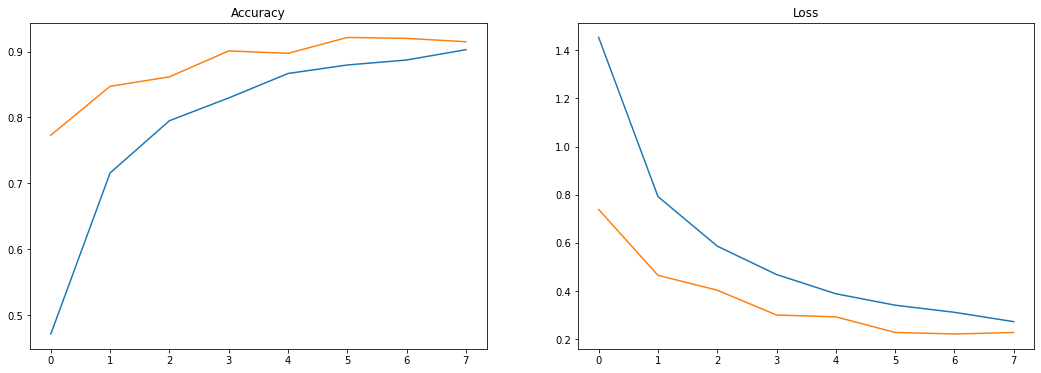

In [ ]:
result=pd.DataFrame(results.history)
fig, ax=plt.subplots(nrows=1, ncols=2,figsize=(18,6))
ax=ax.flatten()
ax[0].plot(result[['accuracy','val_accuracy']])
ax[0].set_title("Accuracy")
ax[1].plot(result[['loss','val_loss']])
ax[1].set_title("Loss")


In [ ]:
pred = model.predict(X_test_img)
pred=np.argmax(pred,axis=1)

In [ ]:
pred_df=X_test.copy()
labels={}
for l,v in X_test_img.class_indices.items():
    labels.update({v:l})
pred_df['pred']=pred
pred_df['pred']=pred_df['pred'].apply(lambda x: labels[x])
    

Accuracy Score: 0.9222222222222223


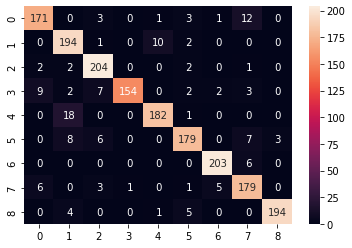

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
print(f"Accuracy Score: {accuracy_score(pred_df['label'],pred_df['pred'])}")
sns.heatmap(confusion_matrix(pred_df['label'],pred_df['pred']), annot=True, fmt='2d')

                                                   path               label  \
7940  /content/Fish_Dataset/Fish_Dataset/Trout/Trout...               Trout   
1162  /content/Fish_Dataset/Fish_Dataset/Hourse Mack...     Hourse Mackerel   
582   /content/Fish_Dataset/Fish_Dataset/Striped Red...  Striped Red Mullet   
8412  /content/Fish_Dataset/Fish_Dataset/Red Sea Bre...       Red Sea Bream   
8730  /content/Fish_Dataset/Fish_Dataset/Red Sea Bre...       Red Sea Bream   
5936  /content/Fish_Dataset/Fish_Dataset/Gilt-Head B...     Gilt-Head Bream   
8283  /content/Fish_Dataset/Fish_Dataset/Red Sea Bre...       Red Sea Bream   
3706  /content/Fish_Dataset/Fish_Dataset/Black Sea S...     Black Sea Sprat   
4071  /content/Fish_Dataset/Fish_Dataset/Sea Bass/Se...            Sea Bass   

                    pred  
7940               Trout  
1162     Hourse Mackerel  
582   Striped Red Mullet  
8412       Red Sea Bream  
8730       Red Sea Bream  
5936     Gilt-Head Bream  
8283       Red Sea B

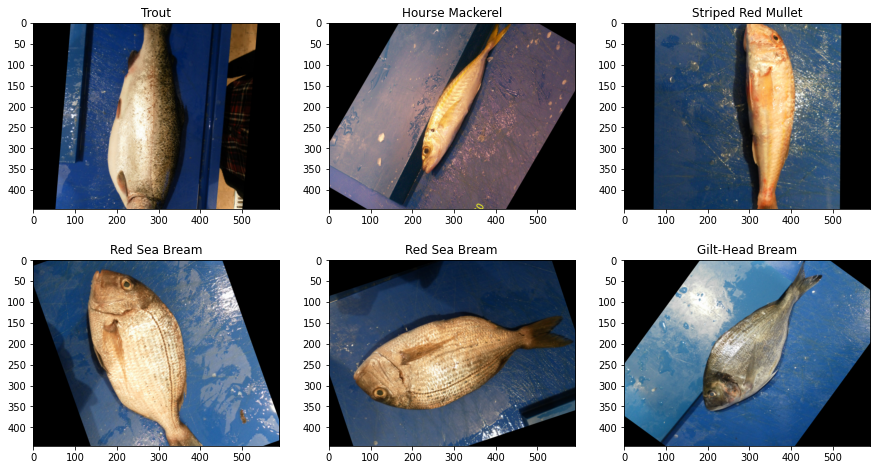

In [ ]:
print(pred_df[pred_df['label']==pred_df['pred']].head(9))
fig, ax=plt.subplots(nrows=2, ncols=3, figsize=(15,8))
ax=ax.flatten()
imlist=pred_df[pred_df['label']==pred_df['pred']].head(6).reset_index()
for i in range(0,6):
    ax[i].imshow(plt.imread(imlist['path'][i]))
    ax[i].set_title(imlist['label'][i])